# 선형회귀(Linear Regression)


In [ ]:
# 보스턴 집값 예측
from sklearn.datasets import load_boston

boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

sklearn.utils.Bunch

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 독립변수
- CRIM : 범죄율
- INDUS : 비소매상업지역 면적비율
- NOX : 일산화질수 농도
- RM : 주택당 방 수
- LSTAT : 하위 계층 비율
- B : 흑인 비율
- PTRATIO : 학생과 선생님 비율
- ZN : 25,000평방 피트를 초과 거주지역 비율
- CHAS : 찰스강의 경계에 위치하면 1 아니면 0
- AGE : 1940년 이전에 건축된 주택의 비율
- RAD : 방사형 고속도로까지의 거리
- DIS : 직업센터의 거리
- TAX : 재산세율
### 종속변수
- 보스턴 506개 타운의 1978년 주택 가격 중앙값(단위 1,000달러)

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns =['MEDV'])

In [ ]:
df = pd.concat([dfX,dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


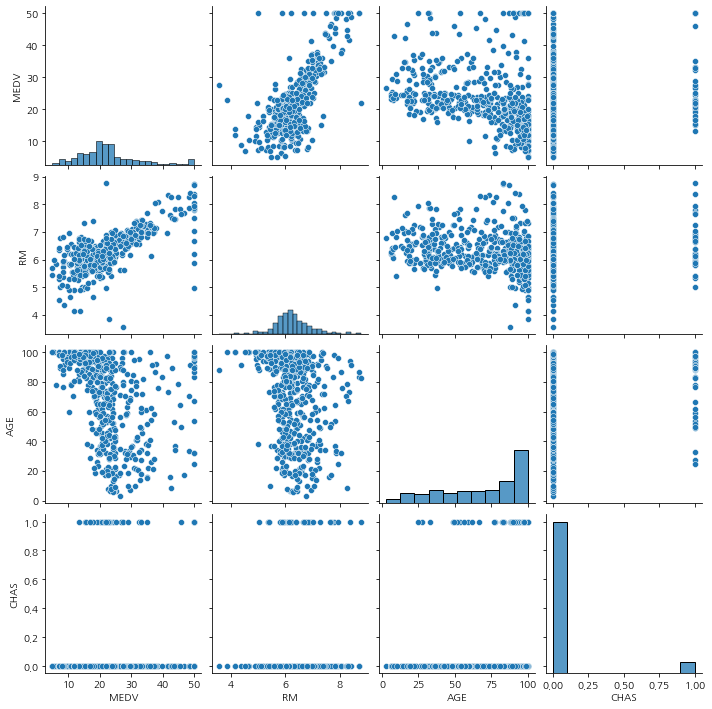

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['MEDV','RM','AGE','CHAS']])
plt.show()

In [ ]:
# 당뇨병 진행도 예측
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


[]

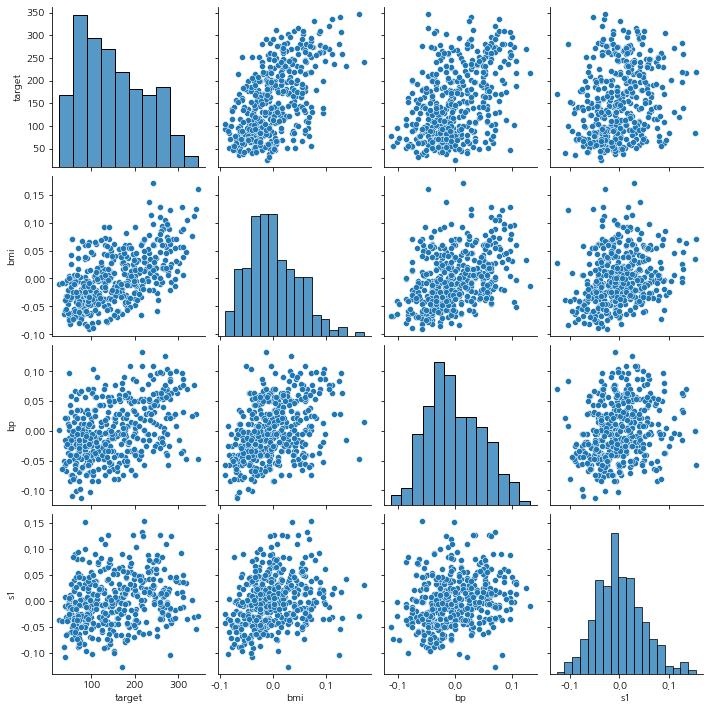

In [ ]:
sns.pairplot(df[['target','bmi','bp','s1']])
plt.plot()

In [ ]:
# 가상 데이터 예측
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)
# X

y = xw+b+e

In [ ]:
import numpy as np
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100

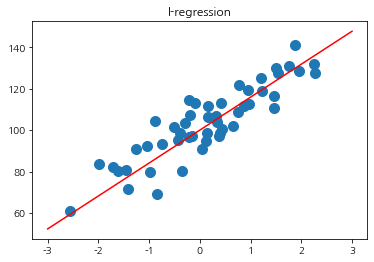

In [ ]:
plt.plot(xx, y0,'r')
plt.scatter(X, y, s=100)
plt.title('l-regression')
plt.show()

## 선형회귀분석 기초
$$\hat{y} = f(x)$$
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D$$
$$= w_0+w^Tx$$

### 최소자승법(OLS)
y와 $\hat{y}$이 가까워 지려면 OLS(Oridnary Least Squares) 방법을 통해 RSS(Residual Sum of Squares)를 최소화시키는 것과 같다.

$$\hat{y} = Xw$$   
$$ϵ=y-\hat{y} =y - Xw$$   
$$RSS = ϵ^Tϵ=(y - Xw)^T(y - Xw)$$   
$$ = y^T-2y^TXw + w^TX^TXw$$

w로 미분하여 잔차제곱합의 그레디언트 벡터를 구합니다.   
잔차가 최소가 되기 위해서는 그레디언트 벡터가 0이어야 합니다.   
$$\frac{dRSS}{dw} = 0$$   
$$\frac{dRSS}{dw} = -2X^Ty + 2X^TXw$$   
$$X^Ty = X^TXw$$   
$$w=(X^TX)^{-1}X^Ty$$



### 직교 방정식
그레디언트 벡터가 0벡터가 되는 관계를 직교방정식
$$X^Ty - X^TXw = 0$$
$$X^T(y-Xw) = 0$$
$$X^Te = 0$$

- 직교 방정식의 성질
      잔차 벡터의 원소의 합은 0
$$\Sigma_{i=0}^Ne_i=0$$

      x 데이터의 평균값에 대한 예측값은 y 데이터의 평균값이다.


In [ ]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y),1)

In [ ]:
w

array(86.44794301)

In [ ]:
# OLS 해 구하기
w = np.linalg.inv(X.T @ X) @ X.T@y
w

array([[99.79150869],
       [86.96171201]])

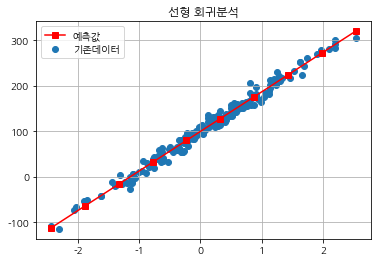

In [ ]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label='기존데이터')
plt.plot(x_new, y_new, 'rs-', label='예측값')
plt.title('선형 회귀분석')
plt.legend()
plt.grid()
plt.show()

#### sklearn을 활용

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0,y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [ ]:
model.predict([[-2],[-1],[0],[1],[2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

#### statsmodel을 활용

In [ ]:
df = pd.DataFrame({'x':X0[:,0], 'y':y[:,0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [ ]:
dfy = df[['y']]
dfX = sm.add_constant(df[['x']])
model = sm.OLS(dfy, dfX)
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS.from_formula("y ~ x",data=df)
result = model.fit()

In [ ]:
result.predict({'x':[1000,2000]})

0     87061.503522
1    174023.215535
dtype: float64

In [ ]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

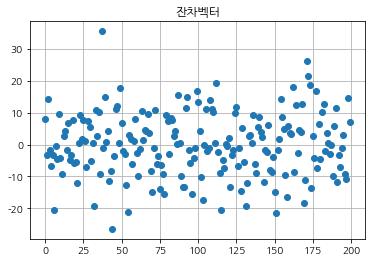

In [ ]:
result.resid.plot(style='o')
plt.grid()
plt.title('잔차벡터')
plt.show()

In [ ]:
result.resid.sum()

6.036060540282051e-12

In [ ]:
result.predict({'x':X0.mean()})

0    109.069351
dtype: float64

In [ ]:
y.mean()

109.06935068170775

#### 보스턴 집값 예측


In [ ]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
dfX = sm.add_constant(dfX0)

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        05:44:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
A = np.eye(4)
np.linalg.cond(A)

1.0

In [ ]:
b = np.ones(4)
x = np.linalg.solve(A,b)

In [ ]:
x

array([1., 1., 1., 1.])

In [ ]:
x_error = np.linalg.solve(A + 0.0001 * np.eye(4), b)

In [ ]:
x_error

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

In [ ]:
import scipy as sp
A = sp.linalg.hilbert(4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

In [ ]:
np.linalg.cond(A)

15513.73873892924

In [ ]:
sp.linalg.solve(A,b)

array([  -4.,   60., -180.,  140.])

In [ ]:
sp.linalg.solve(A + 0.0001*np.eye(4), b)

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

In [ ]:
dfX.describe().loc['std']

const        0.000000
CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [ ]:
dfX2 = dfX.copy()
dfX2['TAX'] *= 1e13
df = pd.concat([dfX2, dfy], axis=1)
model2 = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names),data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.42
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           8.42e-44
Time:                        06:30:40   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.554      0.0

In [ ]:
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = [f'scale({name})' for name in feature_names] + ['CHAS']
model3 = sm.OLS.from_formula('MEDV ~ ' + "+".join(feature_names),data= df)

In [ ]:
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        06:35:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

## 범주형 독립변수
D개의 독립변수를 가지는 선형회귀모델
$$\hat{Y} = w_0 + w_1x_1 + ⋯ + w_Dx_D$$

$$\hat{Y} = w_{A,0} + w_{A,1}x_2 + ⋯ + w_{A, D}x_D$$ 
$$\hat{Y} = w_{B,0} + w_{B,1}x_2 + ⋯ + w_{B, D}x_D$$ 

- 더미 변수 방법   
  - 풀랭크 방식
$$w_1x_1 = w_{1A}d_{1A}+w_{1B}d_{1B}$$   
$$\hat{Y} = w_0 + w_{1A}d_{1A}+w_{1B}d_{1B} + ⋯ + w_Dx_D$$


$x1 = A : d_{1A} = 1, d_{1B}=0$   
$x1 = B : d_{1A} = 0, d_{1B}=1$

$$x_1 = A : \hat{Y} = w_0 + w_{1A} + w_2x_2 + ⋯ + w_Dx_D$$
$$x_1 = B : \hat{Y} = w_0 + w_{1B} + w_2x_2 + ⋯ + w_Dx_D$$

In [ ]:
import datetime
from calendar import isleap

def convert_partial_year(number):
  # 날짜 계산
  year = int(number)
  d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
  day_one = datetime.datetime(year, 1, 1)
  date = d + day_one
  return date

df_nottem = sm.datasets.get_rdataset('nottem').data

In [ ]:
df_nottem.head()

,time,value
0,1920.000000,40.6
1,1920.083333,40.8
2,1920.166667,44.4
3,1920.250000,46.7
4,1920.333333,54.1


In [ ]:
df_nottem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    240 non-null    float64
 1   value   240 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [ ]:
df_nottem['date0'] = df_nottem[['time']].applymap(convert_partial_year)
df_nottem['date'] = pd.DatetimeIndex(df_nottem['date0']).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem['month'] = df_nottem['date'].dt.strftime('%m').astype('category')
del df_nottem['date0'], df_nottem['date']
df_nottem.head()

,time,value,month
0,1920.000000,40.6,01
1,1920.083333,40.8,02
2,1920.166667,44.4,03
3,1920.250000,46.7,04
4,1920.333333,54.1,05


In [ ]:
df_nottem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   time    240 non-null    float64 
 1   value   240 non-null    float64 
 2   month   240 non-null    category
dtypes: category(1), float64(2)
memory usage: 4.5 KB


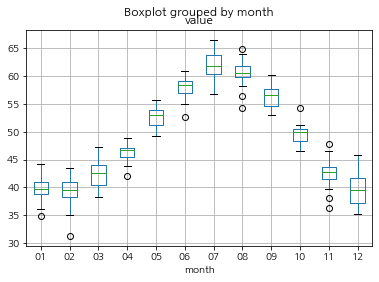

In [ ]:
df_nottem.boxplot('value', 'month')
plt.show()

In [ ]:
# x : 월 (12개)
# 종속변수 (y) : 월 평균기온
model = sm.OLS.from_formula('value ~ C(month) + 0', data=df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          2.96e-125
Time:                        07:24:34   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df_boston = pd.concat([dfX,dfy], axis=1)

model1 = sm.OLS.from_formula('MEDV ~ '+ '+'.join(boston.feature_names), data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        07:30:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [ ]:
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = [name for name in feature_names] + ['C(CHAS)']
model2 = sm.OLS.from_formula('MEDV ~ 0 + '+'+'.join(feature_names),data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        07:33:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4595      5.103      7.144   